In [1]:
# importing the libraries
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing the dataset
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
# display the first 5 rows of the train dataset
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
# printing the number of unique labels
print(len(train['label'].unique()))

24


In [5]:
# display the first 5 rows of the test dataset
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
# split the train dataset into X and y
X_train = train.iloc[:, 1:].values
y_train = train.iloc[:, 0].values

In [7]:
print(y_train)

[ 3  6  2 ... 18 17 23]


In [8]:
# split the test dataset into X and y
X_test = test.iloc[:, 1:].values
y_test = test.iloc[:, 0].values

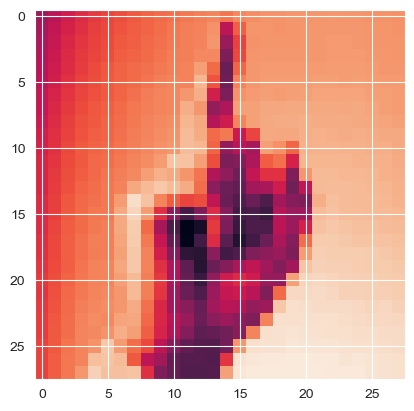

In [9]:
# displaying an image from the dataset
plt.imshow(X_train[0].reshape(28, 28))

113


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.82069157836029 0.6674567763524819 0.8519241494701617


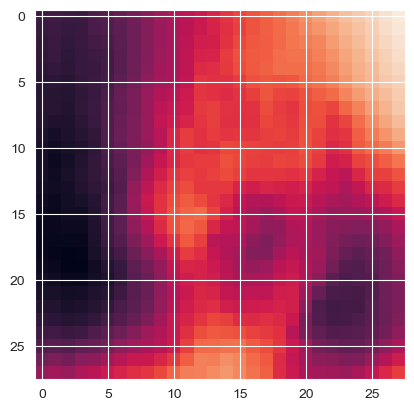

In [10]:
# flattening the images
X_train = [i.flatten() for i in X_train]
X_test = [i.flatten() for i in X_test]
# applying PCA on the train data
# importing the PCA from sklearn
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
pca.fit(X_train)

# displaying the number of components
print(pca.n_components_)
# displaying the Eigen Faces
plt.imshow(pca.components_[0].reshape(28, 28))

# transforming the train and test data
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)
# applying 1-NN on the train and test data
# importing the KNeighborsClassifier from sklearn
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
# predicting the test data
y_pred = knn.predict(X_test)
# printing the accuracy score
from sklearn.metrics import accuracy_score

# applying logistic regression on the train and test data
# importing the LogisticRegression from sklearn
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
# predicting the test data
y_pred = log_reg.predict(X_test)

# applying SVM on the train and test data
# importing the SVC from sklearn
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
# predicting the test data
y_pred = svm.predict(X_test)


print(knn.score(X_test, y_test),log_reg.score(X_test, y_test),svm.score(X_test, y_test))

In [21]:
def acc_fun(X_train, y_train, X_test, y_test,n_components=0.95,n_neighbors=1):
    # flattening the images
    X_train = [i.flatten() for i in X_train]
    X_test = [i.flatten() for i in X_test]
    # applying PCA on the train data
    # importing the PCA from sklearn
    from sklearn.decomposition import PCA
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    # transforming the train and test data
    X_train = pca.transform(X_train)
    X_test = pca.transform(X_test)
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)
    y_pred = log_reg.predict(X_test)
    svm = SVC()
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    # returning all the three accuracies
    return knn.score(X_test, y_test), log_reg.score(X_test, y_test), svm.score(X_test, y_test)

In [12]:
# picking 2 random labels from the train dataset and storing them in a list
import random
random_names = random.sample(list(train['label'].unique()),2)
knn_2_acc,log_2_acc,svm_2_acc = acc_fun(train[train['label'].isin(random_names)].iloc[:, 1:].values, train[train['label'].isin(random_names)].iloc[:, 0].values, test[test['label'].isin(random_names)].iloc[:, 1:].values, test[test['label'].isin(random_names)].iloc[:, 0].values)
# printing the accuracies
print(knn_2_acc,log_2_acc,svm_2_acc)

0.9982668977469671 0.9306759098786829 1.0


/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# picking 4 random labels from the train dataset and storing them in a list
random_names = random.sample(list(train['label'].unique()),4)
knn_4_acc,log_4_acc,svm_4_acc = acc_fun(train[train['label'].isin(random_names)].iloc[:, 1:].values, train[train['label'].isin(random_names)].iloc[:, 0].values, test[test['label'].isin(random_names)].iloc[:, 1:].values, test[test['label'].isin(random_names)].iloc[:, 0].values)
# printing the accuracies
print(knn_4_acc,log_4_acc,svm_4_acc)

/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9331210191082803 0.9847133757961783 0.9923566878980892


In [14]:
# picking 8 random labels from the train dataset and storing them in a list
random_names = random.sample(list(train['label'].unique()),8)
knn_8_acc,log_8_acc,svm_8_acc = acc_fun(train[train['label'].isin(random_names)].iloc[:, 1:].values, train[train['label'].isin(random_names)].iloc[:, 0].values, test[test['label'].isin(random_names)].iloc[:, 1:].values, test[test['label'].isin(random_names)].iloc[:, 0].values)
# printing the accuracies
print(knn_8_acc,log_8_acc,svm_8_acc)

/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9278647980214345 0.8371805441055234 0.9319868095630668


In [15]:
# picking 16 random labels from the train dataset and storing them in a list
random_names = random.sample(list(train['label'].unique()),16)
knn_16_acc,log_16_acc,svm_16_acc = acc_fun(train[train['label'].isin(random_names)].iloc[:, 1:].values, train[train['label'].isin(random_names)].iloc[:, 0].values, test[test['label'].isin(random_names)].iloc[:, 1:].values, test[test['label'].isin(random_names)].iloc[:, 0].values)
# printing the accuracies
print(knn_16_acc,log_16_acc,svm_16_acc)

/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8400692840646651 0.7303695150115473 0.8670130869899924


In [16]:
# picking 24 random labels from the train dataset and storing them in a list
random_names = random.sample(list(train['label'].unique()),24)
knn_24_acc,log_24_acc,svm_24_acc = acc_fun(train[train['label'].isin(random_names)].iloc[:, 1:].values, train[train['label'].isin(random_names)].iloc[:, 0].values, test[test['label'].isin(random_names)].iloc[:, 1:].values, test[test['label'].isin(random_names)].iloc[:, 0].values)
# printing the accuracies
print(knn_24_acc,log_24_acc,svm_24_acc)

/Users/parzival979/miniforge3/envs/IMAGE_RECOGNITION_PCA/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.82069157836029 0.6674567763524819 0.8519241494701617


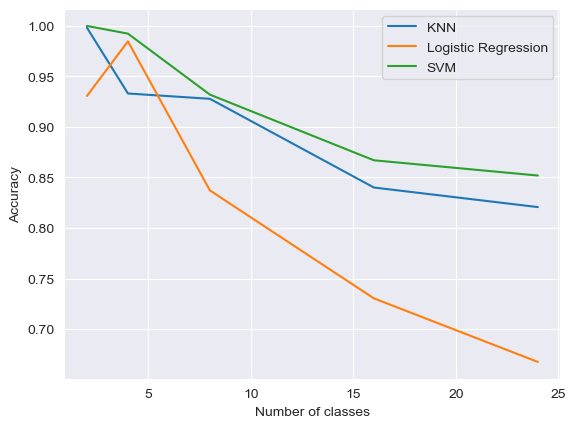

In [17]:
# plotting the accuracies
import matplotlib.pyplot as plt
plt.plot([2,4,8,16,24],[knn_2_acc,knn_4_acc,knn_8_acc,knn_16_acc,knn_24_acc],label='KNN')
plt.plot([2,4,8,16,24],[log_2_acc,log_4_acc,log_8_acc,log_16_acc,log_24_acc],label='Logistic Regression')
plt.plot([2,4,8,16,24],[svm_2_acc,svm_4_acc,svm_8_acc,svm_16_acc,svm_24_acc],label='SVM')
plt.xlabel('Number of classes')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# applying the function for different number of components and storing the accuracies in a list
acc_list = []
for i in range(1,100):
    acc_list.append(acc_fun(train.iloc[:, 1:].values, train.iloc[:, 0].values, test.iloc[:, 1:].values, test.iloc[:, 0].values,n_components=i))

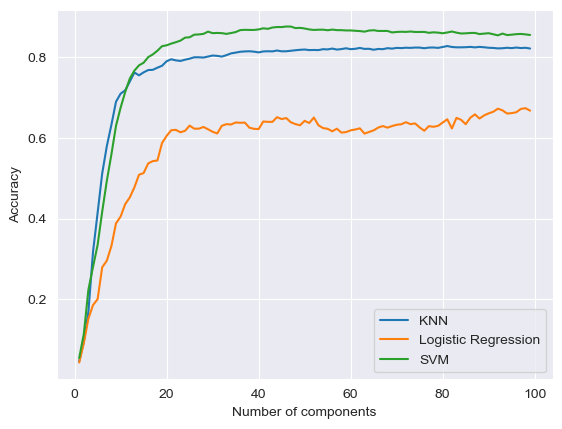

In [19]:
# plotting the accuracies
import matplotlib.pyplot as plt
plt.plot(range(1,100),[i[0] for i in acc_list],label='KNN')
plt.plot(range(1,100),[i[1] for i in acc_list],label='Logistic Regression')
plt.plot(range(1,100),[i[2] for i in acc_list],label='SVM')
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# applying the function for different number of neighbors and storing the accuracies in a list
acc_list = []
for i in range(1,20):
    acc_list.append(acc_fun(train.iloc[:, 1:].values, train.iloc[:, 0].values, test.iloc[:, 1:].values, test.iloc[:, 0].values,n_neighbors=i)[0])

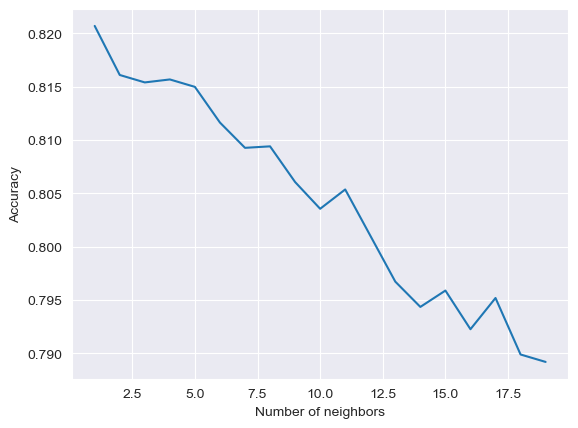

In [23]:
# plotting the accuracies for different number of neighbors
import matplotlib.pyplot as plt
plt.plot(range(1,20),acc_list)
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()